In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade arabic-reshaper
!pip install python-bidi

import arabic_reshaper
from bidi.algorithm import get_display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 2.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
  Running setup.py install for future ... done


In [68]:
def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

In [15]:
data = pd.read_csv('../data/gov_banking_data.csv')

In [16]:
data.head()

,المدينة,نوع_التمويل,المنتج,قطاع_العميل,قيمة_التمويل,قيمة_القسط,تاريخ_الصرف,جنس_العميل,الفئة_العمرية,الحالة_الاجتماعية,احتياجات_خاصة,عدد_افراد_الاسرة,قرض_ادخاري,قيمة_الدخل,نوع_الدخل,السنة
0,الأحساء,تمويل الافراد,قرض أسرة,قطاع حكومي,60000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,>= 02,لا,>= 7500,متوسط,2018
1,الأحساء,تمويل الاعمال,قرض مشروع ناشيء,متقاعد حكومي,122000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,< 02,لا,< 5000,منخفض جدا,2018
2,الأحساء,تمويل الافراد,قرض أسرة,متقاعد حكومي,60000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,>= 05,لا,< 5000,منخفض جدا,2018
3,الأحساء,تمويل الافراد,قرض زواج,قطاع حكومي,48000.0,< 1000,2018/01,ذكر,بالغين,متزوج,لا,>= 02,لا,>= 5000,منخفض,2018
4,الأحساء,تمويل الاعمال,عربات البيع المتنقلة,غير معروف,150000.0,>= 1000,2018/01,ذكر,بالغين,متزوج,لا,< 02,لا,< 5000,منخفض جدا,2018


In [17]:
data['قيمة_القسط'].value_counts()

>= 1000      130008
< 1000        49952
غير معروف        76
Name: قيمة_القسط, dtype: int64

In [18]:
data.isna().sum()

المدينة              0
نوع_التمويل          0
المنتج               0
قطاع_العميل          0
قيمة_التمويل         0
قيمة_القسط           0
تاريخ_الصرف          0
جنس_العميل           0
الفئة_العمرية        0
الحالة_الاجتماعية    0
احتياجات_خاصة        0
عدد_افراد_الاسرة     0
قرض_ادخاري           0
قيمة_الدخل           0
نوع_الدخل            0
السنة                0
dtype: int64

In [5]:
def sr_hello():
    print('Hello, from Sara!')

In [6]:
# Counts for gender
# Counts for ages 
# Counts for cities 
# Counts type of loan 
# Product
# Marital status
# Income
# Count per year -- why? 
- How are cities related to income? 
- Products vs cities
- Analyze the change in loan counts/products over the years, why is it that way? 
- Products and loan values -- which products require more or higher loans? 
- Income and loan values -- relationship 
- Minimum income to get a loan for each product and installment value
- Handicapped people, do they get higher loans?
- Age and types of loans and how many do they take (on average)
- Same for the marital state
- Retired people, do they take out more loans than working people? Do they make more money? 
- Which sector do people make more money, take more loans, most frequent type of loan in each sector?

- How are cities related to income? 
- Products vs cities
- Analyze the change in loan counts/products over the years, why is it that way? 
- Products and loan values -- which products require more or higher loans? 
- Income and loan values -- relationship 
- Minimum income to get a loan for each product and installment value
- Handicapped people, do they get higher loans?
- Age and types of loans and how many do they take (on average)
- Same for the marital state
- Retired people, do they take out more loans than working people? Do they make more money? 
- Which sector do people make more money, take more loans, most frequent type of loan in each sector?

In [19]:
data[data['المنتج'] == 'قرض القائم'].sort_values(by = 'قيمة_التمويل').head(10)

,المدينة,نوع_التمويل,المنتج,قطاع_العميل,قيمة_التمويل,قيمة_القسط,تاريخ_الصرف,جنس_العميل,الفئة_العمرية,الحالة_الاجتماعية,احتياجات_خاصة,عدد_افراد_الاسرة,قرض_ادخاري,قيمة_الدخل,نوع_الدخل,السنة
129464,الدمام,تمويل الاعمال,قرض القائم,قطاع خاص,220000.0,>= 1000,2022/02,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022
130926,الرياض,تمويل الاعمال,قرض القائم,قطاع خاص,300000.0,>= 1000,2022/02,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022
73851,النماص,تمويل الاعمال,قرض القائم,غير معروف,400000.0,>= 1000,2021/01,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
73857,الطائف,تمويل الاعمال,قرض القائم,غير معروف,420000.0,>= 1000,2021/01,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
129425,الدمام,تمويل الاعمال,قرض القائم,قطاع خاص,450000.0,>= 1000,2022/01,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022
80102,حفر الباطن,تمويل الاعمال,قرض القائم,غير معروف,480000.0,>= 1000,2021/02,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
1142,الرياض,تمويل الاعمال,قرض القائم,غير معروف,573000.0,>= 1000,2018/01,ذكر,كبار سن,متزوج,لا,< 02,لا,< 5000,منخفض جدا,2018
73849,جدة,تمويل الاعمال,قرض القائم,غير معروف,580000.0,>= 1000,2021/01,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
73855,الرياض,تمويل الاعمال,قرض القائم,غير معروف,600000.0,>= 1000,2021/01,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
80091,القريات,تمويل الاعمال,قرض القائم,غير معروف,600000.0,>= 1000,2021/02,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021


In [20]:
data[data['قيمة_التمويل'] == 10000000]

,المدينة,نوع_التمويل,المنتج,قطاع_العميل,قيمة_التمويل,قيمة_القسط,تاريخ_الصرف,جنس_العميل,الفئة_العمرية,الحالة_الاجتماعية,احتياجات_خاصة,عدد_افراد_الاسرة,قرض_ادخاري,قيمة_الدخل,نوع_الدخل,السنة
80092,الرياض,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/02,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
90923,خميس مشيط,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/03,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
90950,الرياض,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/03,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
90956,الرياض,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/03,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
90994,الرياض,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/03,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
103788,المدينة,تمويل الاعمال,قرض القائم,غير معروف,10000000.0,>= 1000,2021/04,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,غير معروف,2021
129205,الرياض,تمويل الاعمال,قرض القائم,قطاع خاص,10000000.0,>= 1000,2022/03,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022
129310,الرياض,تمويل الاعمال,قرض القائم,قطاع خاص,10000000.0,>= 1000,2022/01,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022
129782,عرعر,تمويل الاعمال,قرض القائم,قطاع خاص,10000000.0,>= 1000,2022/01,أنثى,غير معروف,غير معروف,لا,غير معروف,لا,غير معروف,غير معروف,2022


In [9]:
data.groupby('المنتج').mean().sort_values(by='قيمة_التمويل')[['قيمة_التمويل']] # Boxplots 

,قيمة_التمويل
المنتج,
فئات خاصة,2.895889e+04
قرض أسرة,5.197041e+04
قرض ترميم,5.219169e+04
قرض العمل الحر نقدي,5.387840e+04
قرض زواج,5.529699e+04
قرض سيارة,9.309395e+04
قرض النقل التشاركي,1.143269e+05
اتصالات,1.194444e+05
عربات البيع المتنقلة,1.413139e+05


In [10]:
data.groupby('المنتج').sum().sort_values(by='قيمة_التمويل')[['قيمة_التمويل']] # Boxplots 

,قيمة_التمويل
المنتج,
سيولة,5.750000e+05
الإختراع,8.970000e+05
قرض نقاط البيع,3.509000e+06
اتصالات,4.300000e+06
قرض امتياز تجاري,5.834150e+06
برنامج ساهم,6.442000e+06
قرض التقنيات الناشئة,7.480726e+06
عربات البيع المتنقلة,2.119709e+07
برنامج دائم,2.408319e+07


In [11]:
data.groupby('المنتج').mean().sort_values(by='قيمة_التمويل')[['قيمة_التمويل', 'قيمة_القسط']]

,قيمة_التمويل,قيمة_القسط
المنتج,,
فئات خاصة,2.895889e+04,0.000000
قرض أسرة,5.197041e+04,0.656341
قرض ترميم,5.219169e+04,0.665896
قرض العمل الحر نقدي,5.387840e+04,0.732744
قرض زواج,5.529699e+04,0.768539
قرض سيارة,9.309395e+04,0.993496
قرض النقل التشاركي,1.143269e+05,1.000000
اتصالات,1.194444e+05,1.000000
عربات البيع المتنقلة,1.413139e+05,0.986577


In [12]:
a = data.groupby(['المنتج'])['المنتج'].count()/data["المنتج"].count()*100
a.sort_values()

المنتج
الإختراع                 0.000555
برنامج ساهم              0.001666
سيولة                    0.002222
قرض نقاط البيع           0.004444
قرض امتياز تجاري         0.004999
برنامج دائم              0.005554
قرض التقنيات الناشئة     0.005554
اتصالات                  0.019996
قرض القائم               0.034993
قرض التميز               0.079984
عربات البيع المتنقلة     0.083317
قرض خريجين ناشيء         0.104979
قرض النقل التشاركي       0.329934
قرض سيارة                0.341598
قرض ترميم                0.481015
قرض مشروع حل             0.759293
فئات خاصة                2.080695
قرض مشروع ناشيء          2.296763
قرض أسرة                24.325135
قرض العمل الحر نقدي     28.731476
قرض زواج                40.305828
Name: المنتج, dtype: float64

In [13]:
data.isna().sum()

المدينة                0
نوع_التمويل            0
المنتج                 0
قطاع_العميل            0
قيمة_التمويل           0
قيمة_القسط            76
تاريخ_الصرف            0
جنس_العميل            38
الفئة_العمرية          0
الحالة_الاجتماعية     94
احتياجات_خاصة         50
عدد_افراد_الاسرة     157
قرض_ادخاري             0
قيمة_الدخل             0
نوع_الدخل              0
السنة                  0
dtype: int64

<AxesSubplot:xlabel='عدد_افراد_الاسرة', ylabel='count'>

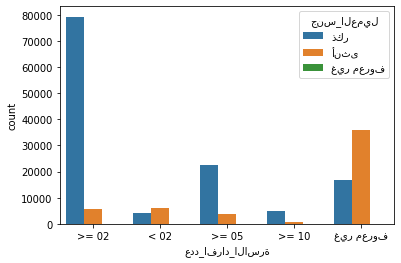

In [21]:
import seaborn as sns
sns.countplot(x=data['عدد_افراد_الاسرة'], hue=data['جنس_العميل'])  # color code by marital status 
# عدد افراد الاسرة وقرض الاسرة 
# اغلب العملاء يكونون ذكور اذا كان عدد افراد الاسرة ما بين ٢-٤

In [28]:
data.groupby('المنتج').count().sort_values(by = 'عدد_افراد_الاسرة', ascending = False).head(5)

,المدينة,نوع_التمويل,قطاع_العميل,قيمة_التمويل,قيمة_القسط,تاريخ_الصرف,جنس_العميل,الفئة_العمرية,الحالة_الاجتماعية,احتياجات_خاصة,عدد_افراد_الاسرة,قرض_ادخاري,قيمة_الدخل,نوع_الدخل,السنة
المنتج,,,,,,,,,,,,,,,
قرض زواج,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565,72565
قرض العمل الحر نقدي,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727,51727
قرض أسرة,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794,43794
قرض مشروع ناشيء,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135
فئات خاصة,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746,3746


In [46]:
o = data.groupby(['عدد_افراد_الاسرة','جنس_العميل'])[['المنتج']].count().sort_values(by = 'المنتج',ascending = False)
# data['المنتج'].value_counts()
o

,,المنتج
عدد_افراد_الاسرة,جنس_العميل,
>= 02,ذكر,79229
غير معروف,أنثى,35839
>= 05,ذكر,22713
غير معروف,ذكر,16788
< 02,أنثى,5955
>= 02,أنثى,5794
>= 10,ذكر,4784
< 02,ذكر,4210
>= 05,أنثى,3832


In [55]:
prod_cnt = pd.DataFrame(data['المنتج'].value_counts())
prod_cnt.index[:5]

Index(['قرض زواج', 'قرض العمل الحر نقدي', 'قرض أسرة', 'قرض مشروع ناشيء',
       'فئات خاصة'],
      dtype='object')

In [58]:
data.groupby(['عدد_افراد_الاسرة','جنس_العميل','المنتج']).count()
prods = data[data['المنتج'].isin(prod_cnt.index[:5])]
prods['المنتج'].value_counts()

قرض زواج               72565
قرض العمل الحر نقدي    51727
قرض أسرة               43794
قرض مشروع ناشيء         4135
فئات خاصة               3746
Name: المنتج, dtype: int64

In [60]:
prods.groupby(['عدد_افراد_الاسرة','جنس_العميل','المنتج']).count()

المدينة  نوع_التمويل  \
عدد_افراد_الاسرة جنس_العميل المنتج                                      
< 02             أنثى       فئات خاصة               3695         3695   
                            قرض أسرة                   2            2   
                            قرض مشروع ناشيء         1403         1403   
                 ذكر        فئات خاصة                 45           45   
                            قرض أسرة                  24           24   
                            قرض مشروع ناشيء         2573         2573   
>= 02            أنثى       فئات خاصة                  4            4   
                            قرض أسرة                5626         5626   
                            قرض مشروع ناشيء            7            7   
                 ذكر        قرض أسرة                9533         9533   
                            قرض زواج               69614        69614   
                            قرض مشروع ناشيء            8            8   
>= 05            أنثى       فئات خاصة                  1            1   
                            قرض أسرة                3513         3513   
                            قرض مشروع ناشيء            3            3   
                 ذكر        قرض أسرة               21067        21067   
                            قرض زواج                1533         1533   
                            قرض مشروع ناشيء            5            5   
>= 10            أنثى       فئات خاصة                  1            1   
                            قرض أسرة                 709          709   
                 ذكر        قرض أسرة                3320         3320   
                            قرض زواج                1418         1418   
غير معروف        أنثى       قرض العمل الحر نقدي    35646        35646   
                            قرض مشروع ناشيء           63           63   
                 ذكر        قرض العمل الحر نقدي    16081        16081   
                            قرض مشروع ناشيء           73           73   

                                                 قطاع_العميل  قيمة_التمويل  \
عدد_افراد_الاسرة جنس_العميل المنتج                                           
< 02             أنثى       فئات خاصة                   3695          3695   
                            قرض أسرة                       2             2   
                            قرض مشروع ناشيء             1403          1403   
                 ذكر        فئات خاصة                     45            45   
                            قرض أسرة                      24            24   
                            قرض مشروع ناشيء             2573          2573   
>= 02            أنثى       فئات خاصة                      4             4   
                            قرض أسرة                    5626          5626   
                            قرض مشروع ناشيء                7             7   
                 ذكر        قرض أسرة                    9533          9533   
                            قرض زواج                   69614         69614   
                            قرض مشروع ناشيء                8             8   
>= 05            أنثى       فئات خاصة                      1             1   
                            قرض أسرة                    3513          3513   
                            قرض مشروع ناشيء                3             3   
                 ذكر        قرض أسرة                   21067         21067   
                            قرض زواج                    1533          1533   
                            قرض مشروع ناشيء                5             5   
>= 10            أنثى       فئات خاصة                      1             1   
                            قرض أسرة                     709           709   
                 ذكر        قرض أسرة                    3320          3320   
                            قرض زواج                    1418          1418   
غير معروف        أنثى       قرض العمل الحر نقدي        35646         35646   
                            قرض مشروع ناشيء           

In [64]:
marriage_loan = data[data["المنتج"] == 'قرض زواج']
marriage_loan['جنس_العميل'].value_counts()
# according to the top 5 products, marriage loan is the highest. 
# So, we want to see the gender distribution which links to the bar chart showing family member count 
# All clients are males which account for around 70k of the clients in the barplot and there remains about 10k that we think belong to other products

ذكر    72565
Name: جنس_العميل, dtype: int64

In [65]:
marriage_loan = data[data["المنتج"] == 'قرض زواج']
marriage_loan['عدد_افراد_الاسرة'].value_counts()
# Most people who take out marriage loans have 0 - 2 kids and it's reflected in the barplot 

>= 02    69614
>= 05     1533
>= 10     1418
Name: عدد_افراد_الاسرة, dtype: int64

In [82]:
marriage_loan = data[data["المنتج"] == 'قرض زواج']
marriage_loan['المدينة'].value_counts()
# density plot

الرياض          12347
الدمام           8038
جدة              6458
الأحساء          5155
المدينة          5083
مكة              4747
جازان            3391
خميس مشيط        3212
الطائف           2613
بريدة            2541
تبوك             2523
نجران            1873
ينبع             1504
حفر الباطن       1442
حائل             1319
الخرج            1247
عرعر             1196
الباحة           1175
الجوف            1064
القريات          1015
القنفذة           873
المجمعة           825
الدوادمي          781
الرس              601
وادي الدواسر      583
بيشة              582
النماص            377
Name: المدينة, dtype: int64

In [ ]:
# Products & Cities, loan counts and cities 
# Distribution of loan types 
# Distribution of gender 
# Distribution of ages 


# Overall expenses by the government 
# Over the years -- All products / sum the money that went into them 
# Products and loan values -- which products require more or higher loans? 
# Income & Installments + Loan Value 
# Minimum income to get a loan for each product and installment value
# Handicapped people, do they get higher loans? 
# Retired people, do they take out more loans than working people? Do they make more money? 
# Which sector do people make more money, take more loans, most frequent type of loan in each sector? 

/var/folders/ft/6bcs2wds5sl58dd3v85sg3140000gn/T/ipykernel_12775/1070788264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toSectopn["قطاع_العميل"][index] = modify_arabic_display(toSectopn["قطاع_العميل"][index])
/var/folders/ft/6bcs2wds5sl58dd3v85sg3140000gn/T/ipykernel_12775/1070788264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toSectopn["جنس_العميل"][index] =  modify_arabic_display(toSectopn["جنس_العميل"][index])


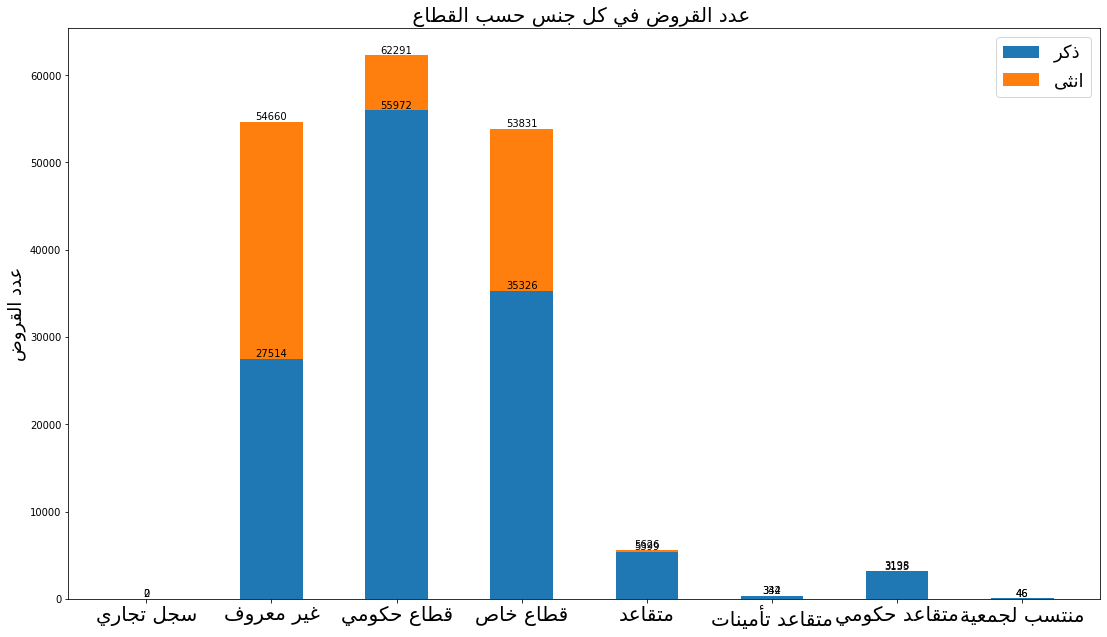

In [81]:
toSectopn = data.groupby(["قطاع_العميل" , 'جنس_العميل'])['قيمة_التمويل'].count().reset_index(name='عدد القروض') 
if toSectopn["قطاع_العميل"][0] =='سجل تجاري':
        for index, row in toSectopn.iterrows():
   
                toSectopn["قطاع_العميل"][index] = modify_arabic_display(toSectopn["قطاع_العميل"][index])
       
                toSectopn["جنس_العميل"][index] =  modify_arabic_display(toSectopn["جنس_العميل"][index])

fig, ax = plt.subplots()
a= list(toSectopn["قطاع_العميل"].unique())

b = list(toSectopn[toSectopn["جنس_العميل"] == "ﺮﻛﺫ"]["عدد القروض"])
b.insert(0,0)
c = list(toSectopn[toSectopn["جنس_العميل"] == "ﻰﺜﻧﺃ"]["عدد القروض"])
c.append(0)

fig.set_size_inches(18.5, 10.5)

ax.bar(a, b, 0.5  , label=modify_arabic_display("ذكر") )
ax.bar(a,  c, 0.5 , bottom=b,
       label=modify_arabic_display('انثى'))
plt.tick_params(axis='x', which='major', labelsize=20)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_ylabel(modify_arabic_display('عدد القروض') ,  fontsize = 18)
ax.set_title(modify_arabic_display("  عدد القروض في كل جنس حسب القطاع " ) , fontsize = 20)
ax.legend(fontsize = 18)

plt.show()

In [ ]:
temp = data["المنتج"].value_counts() # top five

temp.iplot(kind='bar', xTitle = 'المنتج', yTitle = "العدد", title = 'عدد القروض', xanchor= 'center', color = 'green')

In [23]:
data.head()

,المدينة,نوع_التمويل,المنتج,قطاع_العميل,قيمة_التمويل,قيمة_القسط,تاريخ_الصرف,جنس_العميل,الفئة_العمرية,الحالة_الاجتماعية,احتياجات_خاصة,عدد_افراد_الاسرة,قرض_ادخاري,قيمة_الدخل,نوع_الدخل,السنة
0,الأحساء,تمويل الافراد,قرض أسرة,قطاع حكومي,60000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,>= 02,لا,>= 7500,متوسط,2018
1,الأحساء,تمويل الاعمال,قرض مشروع ناشيء,متقاعد حكومي,122000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,< 02,لا,< 5000,منخفض جدا,2018
2,الأحساء,تمويل الافراد,قرض أسرة,متقاعد حكومي,60000.0,>= 1000,2018/01,ذكر,بالغين في منتصف العمر,متزوج,لا,>= 05,لا,< 5000,منخفض جدا,2018
3,الأحساء,تمويل الافراد,قرض زواج,قطاع حكومي,48000.0,< 1000,2018/01,ذكر,بالغين,متزوج,لا,>= 02,لا,>= 5000,منخفض,2018
4,الأحساء,تمويل الاعمال,عربات البيع المتنقلة,غير معروف,150000.0,>= 1000,2018/01,ذكر,بالغين,متزوج,لا,< 02,لا,< 5000,منخفض جدا,2018
